<b>1. Remove all special characters from below texts.</b>

In [52]:
Article = """"body":{"text":"this is a #tag","messageSegments":[{"type":"Text","text":"this is a
"},{"type":"Hashtag","text":"#tag","tag":"tag","url":"/_ui/common/search/client/ui/Chatt
erSearchResultsPage?str=%23tag&sen=a0f&sen=a0e&sen=a0d&sen=068&sen=a0D&sen
=005&sen=a0G&sen=a0J&sen=a0i&sen=015&sen=a0g&sen=a0V&sen=a01&sen=a02&se
n=a0P&sen=a08&sen=a0Y&sen=a0Z&sen=0F9&cache=grdlvher&chatterSearchArea=FEE
D_TOPIC_FEED_LINK_CLICK"}]}"""

In [53]:
# Cleaning the text data to remove all punctuations, numbers and special characters
import re

# replace special character with a space
cleanedArticle = re.sub(r'[^a-z A-Z 0-9]',r' ',Article)  #used r'[^a-z A-Z 0-9]+' instead of r'[^a-z A-Z 0-9]' for remove more than one space character

cleanedArticle

' body    text   this is a  tag   messageSegments     type   Text   text   this is a      type   Hashtag   text    tag   tag   tag   url     ui common search client ui Chatt erSearchResultsPage str  23tag sen a0f sen a0e sen a0d sen 068 sen a0D sen  005 sen a0G sen a0J sen a0i sen 015 sen a0g sen a0V sen a01 sen a02 se n a0P sen a08 sen a0Y sen a0Z sen 0F9 cache grdlvher chatterSearchArea FEE D TOPIC FEED LINK CLICK    '

<b>2. Remove all the numbers from the texts.</b>

In [54]:
Article = """If you were born in 1949 and earned $20,000 in 1980, they would multiply those earnings by an inflation adjustment factor of 3.25, meaning they would actually use $65,000 \
as your 1980 earnings. But if you were born in 1950 and earned that same $20,000 in \
1980, they would use an inflation factor of 3.33, resulting in $66,600 as the 1980 earnings \
used in your Social Security computation."""

In [55]:
# replace number character with a space
cleanedArticle = re.sub(r'[^a-z A-Z \W_]',r' ',Article)  

cleanedArticle

'If you were born in      and earned $  ,    in     , they would multiply those earnings by an inflation adjustment factor of  .  , meaning they would actually use $  ,    as your      earnings. But if you were born in      and earned that same $  ,    in     , they would use an inflation factor of  .  , resulting in $  ,    as the      earnings used in your Social Security computation.'

<b>3. What are the top 5 Unigram words?</b>

In [56]:
Article = """“The government's sudden enforcement of the lockdown seemed hastily prepared and
immediately disadvantaged already vulnerable populations. There has been a mass
exodus of migrant workers and concerns are rising about starvation among people who 
work in the informal economy. Implementing public health measures is difficult in places
with overcrowded living conditions and inadequate hygiene and sanitation. Non-COVID19 health services have been disrupted.
Reports suggest that the government's efforts to
provide financial support and a measure of food security to ease these pressures will be
insufficient to meet demand. But better planning and communication could have helped
avert this crisis.”"""

In [57]:

# removing everything which is not Alphabets
cleanedArticle = re.sub(r'[^a-z A-Z]',r' ',Article)  

# Converting the whole text to lowercas
cleanedArticle = cleanedArticle.lower()     

# Deleting any word which is less than 4-characters mostly those are stopwords
cleanedArticle= re.sub(r'\b\w{1,3}\b', ' ', cleanedArticle)

# Stripping extra spaces in the text
cleanedArticle= re.sub(r' +', ' ', cleanedArticle)

cleanedArticle

' government sudden enforcement lockdown seemed hastily prepared immediately disadvantaged already vulnerable populations there been mass exodus migrant workers concerns rising about starvation among people work informal economy implementing public health measures difficult places with overcrowded living conditions inadequate hygiene sanitation covid health services have been disrupted reports suggest that government efforts provide financial support measure food security ease these pressures will insufficient meet demand better planning communication could have helped avert this crisis '

In [58]:
# Finding out the frequency of words in text
import pandas as pd

# Splitting the text to make list of words
WordList=cleanedArticle.split()

# Creating a Dataframe
WordData=pd.DataFrame(data= pd.Series(WordList), columns=['words'])

# Finding the top frequency words
WordData.groupby('words').size().nlargest(5)

words
been          2
government    2
have          2
health        2
about         1
dtype: int64

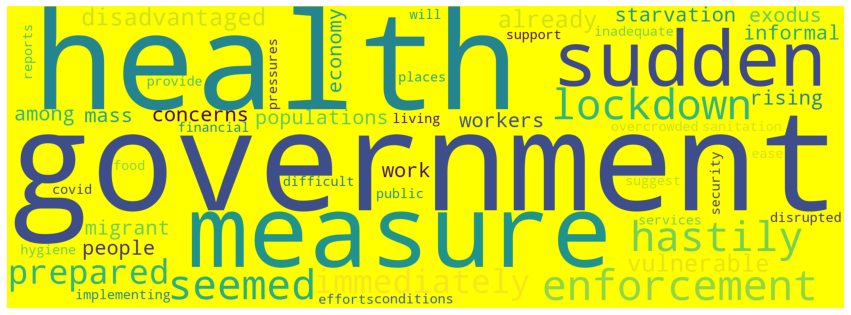

In [59]:
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
import matplotlib.pyplot as plt

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['have','been','about']

wordcloudimage = WordCloud( max_words=50,
                            mode='RGB',
                            background_color='yellow',
                            font_step=2,
                            max_font_size=400,
                            stopwords=customStopwords,
                            width=2000,
                            height=720).generate(cleanedArticle)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

<b>4. What are the top 3 Bigram words?</b>

In [60]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Article)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

textwords = [w.lower() for w in NounPhrases]

In [61]:
# find all bigrams in the given sequence

finder = BigramCollocationFinder.from_words(textwords)
finder.nbest(BigramAssocMeasures.likelihood_ratio,3)

[('financial support', 'food security'),
 ("government 's", 'sudden enforcement'),
 ("government 's efforts", 'financial support')]

In [62]:
from nltk.corpus import stopwords

ignoredWords = set(stopwords.words('english'))     ######### stopwords in english
customStopwords = lambda x: len(x) < 3 or x in ignoredWords     ######  consider stopwords, those words 
                                                                ######  which has less than 2 character

In [63]:
finder.apply_word_filter(customStopwords)
finder.nbest(BigramAssocMeasures.likelihood_ratio,3)

[('financial support', 'food security'),
 ("government 's", 'sudden enforcement'),
 ("government 's efforts", 'financial support')]

<b>5. What are the top 3 Trigram words?</b>

In [64]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Article)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

textwords = [w.lower() for w in NounPhrases]

finder = TrigramCollocationFinder.from_words(textwords)
finder.nbest(TrigramAssocMeasures.likelihood_ratio,3)

[("government 's", 'sudden enforcement', 'vulnerable populations'),
 ("government 's efforts", 'financial support', 'food security'),
 ('health services', "government 's efforts", 'financial support')]

In [65]:
customStopwords = lambda x: len(x) < 3 or x in ignoredWords
finder.apply_word_filter(customStopwords)
finder.nbest(TrigramAssocMeasures.likelihood_ratio,3)

[("government 's", 'sudden enforcement', 'vulnerable populations'),
 ("government 's efforts", 'financial support', 'food security'),
 ('health services', "government 's efforts", 'financial support')]

## Bigram/Trigram Wordcloud

In [66]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Article = Article.lower()

#Deleting everything which is not characters
Article = re.sub(r'[^a-z A-Z]', ' ',Article)


# Deleting any word which is less than 4-characters mostly those are stopwords
Article= re.sub(r'\b\w{1,3}\b', '', Article)

# Stripping extra spaces in the text
Article= re.sub(r' +', ' ', Article)

Article

' government sudden enforcement lockdown seemed hastily prepared immediately disadvantaged already vulnerable populations there been mass exodus migrant workers concerns rising about starvation among people work informal economy implementing public health measures difficult places with overcrowded living conditions inadequate hygiene sanitation covid health services have been disrupted reports suggest that government efforts provide financial support measure food security ease these pressures will insufficient meet demand better planning communication could have helped avert this crisis '

##### Important word combinations ####
sudden_enforcement_lockdown vulnerable_populations mass_exodus_migrant_workers people_work informal_economy public_health_measures difficult_places inadequate_hygiene_sanitation_covid_health_services government_efforts financial_support_measure_food_security insufficient_meet_demand


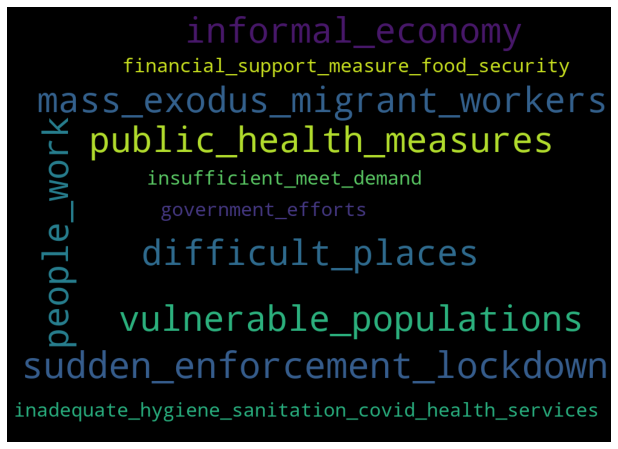

In [67]:


########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Article)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]  
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            min_font_size=12,
                            stopwords=STOPWORDS,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(15,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

<b>6. Print mispelled words.</b>

In [68]:
#!pip install pyspellchecker

In [69]:
Article = """Preparedness and respanse to COVID-19 have differedd at the state lavel each state has
drawn on its experience with the Nipa virus in 2018 to use extentive testing contact 
tracing and communiti mobilisazion to contain the virus and maintain a very low mortaliti
rate It has also set up thousands of temporary shelters for mlgrant workers the exposure
to previous natural disasters meant crisis precaotions were already in place and have
been repurposed drones are used to monitar physical distancing during lockdown and
applyed a cluster containment strategy if three or more patients are diagnosed all houss
within 3 kilometres are surveyed to detect further cases trace contacts and raise
awarenes whether this strategy will be successful is still unclear the premise relies on
there not being communiti transmission and there is danger of stigmatisation and
coercion
"""

In [70]:
###### make word tokens of all words

Article = TextBlob(Article)
Article = Article.words

In [71]:
from spellchecker import SpellChecker

spell = SpellChecker()                 ## initiate object instance of spellchecker class
misspelled = spell.unknown(Article)    ## variable contain all misspelled words from complete corpus

for word in misspelled:
    print(word)

precaotions
mortaliti
covid-19
mobilisazion
monitar
communiti
lavel
stigmatisation
respanse
awarenes
nipa
mlgrant
applyed
extentive
houss
differedd


#### Add more words to dictionary so that dont detect correct words to incorrect words list

In [72]:
from spellchecker import SpellChecker

spell = SpellChecker()

a = spell.word_frequency.load_words(['nipa', 'stigmatisation', 'covid-19'])    ##### Make custom dictionary
misspelled = spell.unknown(Article)

for word in misspelled:
    print(word)

precaotions
extentive
mortaliti
monitar
mobilisazion
lavel
respanse
awarenes
mlgrant
applyed
communiti
houss
differedd


<b>7. Correct those mispelled words.</b>

In [73]:
for word in misspelled:
    print(word,'-->',spell.correction(word))

precaotions --> precautions
extentive --> extensive
mortaliti --> mortality
monitar --> monitor
mobilisazion --> mobilisation
lavel --> level
respanse --> response
awarenes --> awareness
mlgrant --> migrant
applyed --> applied
communiti --> community
houss --> house
differedd --> differed


<b>8. Convert above text into structured dataset.</b>

In [74]:
Article = ['Beautiful is better than ugly','Explicit is better than implicit','Simple is better than complex']

In [75]:
import pandas as pd

df = pd.DataFrame(Article, columns = ['sentence'])
df.head()

,sentence
0,Beautiful is better than ugly
1,Explicit is better than implicit
2,Simple is better than complex


In [76]:
# Extract important words from corpus using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
response = tfidf.fit_transform(Article)
feature_names = tfidf.get_feature_names()
print(feature_names,'\n\n')

for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col])

['beautiful', 'better', 'complex', 'explicit', 'implicit', 'is', 'simple', 'than', 'ugly'] 


ugly  -  0.5729288343964706
than  -  0.3383809989908826
better  -  0.3383809989908826
is  -  0.3383809989908826
beautiful  -  0.5729288343964706
implicit  -  0.0
explicit  -  0.0
than  -  0.3383809989908826
better  -  0.3383809989908826
is  -  0.3383809989908826
complex  -  0.0
simple  -  0.0
than  -  0.3383809989908826
better  -  0.3383809989908826
is  -  0.3383809989908826
